In [1]:
import matplotlib.pyplot as plt
import numpy as np

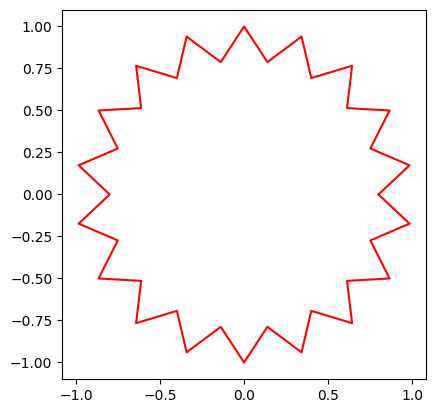

In [2]:
number_of_edges = 36
tau = 2 * np.pi
# arranging angles from 0 till TAU excl
angle_range = np.arange(0, tau, tau / number_of_edges).reshape(-1, 1)
# making a collection of points which form a circle
points = np.hstack((np.cos(angle_range), np.sin(angle_range)))
# decreasing all odd elements to get a concave polygon
points[::2] *= 0.8
# making a closing path
path = np.array([x for x in range(number_of_edges)] + [0])

plt.plot(points[path][:, 0], points[path][:, 1], c="red")
plt.gca().set_aspect('equal')
plt.show()

In [3]:
from src.ear_clipping import orient_path

# testing the orientation to counter-clockwise path
pp = orient_path(points, np.flip(path))
print(pp)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35  0]


In [4]:
def scale_to(coordinates, width=300, height=300, flip_y=True):
    coordinates = np.copy(coordinates)
    min_val = coordinates.min()
    max_val = coordinates.max()

    coordinates[:, 0] = width * (coordinates[:, 0] - min_val) / (max_val - min_val)
    coordinates[:, 1] = height * (coordinates[:, 1] - min_val) / (max_val - min_val)
    if flip_y:
        coordinates[:, 1] = max_val - min_val - coordinates[:, 1]

    return coordinates


In [5]:
from src.ear_clipping import ear_clipping

points = np.array([
    [1, 4],
    [4, 3],
    [5, 1],
    [8, 5],
    [5.5, 2.5],
    [3, 8]
])

path = np.array([0, 1, 2, 3, 4, 5])

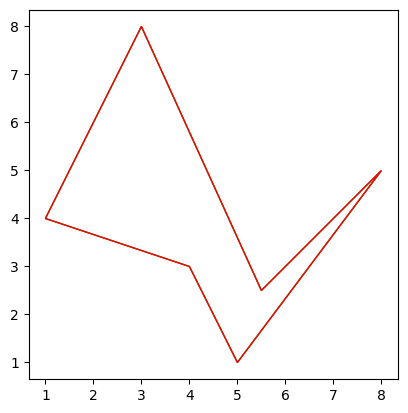

In [6]:
fig, ax = plt.subplots()

patch = plt.Polygon(points, facecolor='none', edgecolor='green')
ax.add_patch(patch)

patch = plt.Polygon(points, facecolor='none', edgecolor='red')
ax.add_patch(patch)

ax.autoscale_view()

plt.gca().set_aspect('equal')

plt.show()

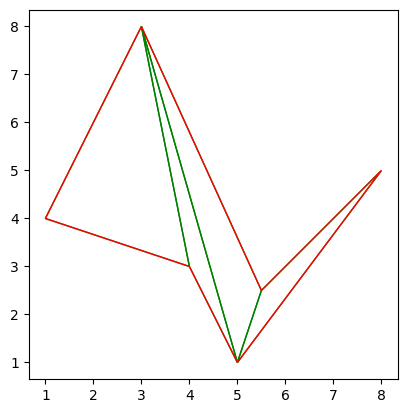

In [7]:

triangles = np.array(ear_clipping(points, path))

fig, ax = plt.subplots()

for triangle in triangles:
    p_points = points[triangle]
    patch = plt.Polygon(p_points, facecolor='none', edgecolor='green')
    ax.add_patch(patch)

patch = plt.Polygon(points, facecolor='none', edgecolor='red')
ax.add_patch(patch)

ax.autoscale_view()

plt.gca().set_aspect('equal')

plt.show()



In [8]:
coords = points[triangles]
# computing the area of each parallelogram
crosses = np.cross(coords[:,1] - coords[:,0], coords[:,2] - coords[:,0],)
# finding the area of all triangles together
common_area = np.sum(crosses) / 2
print(common_area)

13.0


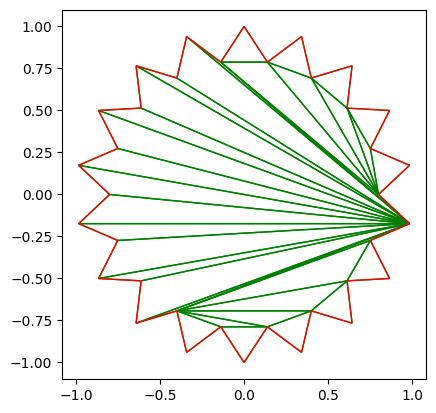

In [9]:
from src.ear_clipping import ear_clipping
import matplotlib.pyplot as plt

number_of_edges = 36
tau = 2 * np.pi
# arranging angles from 0 till TAU excl
angle_range = np.arange(0, tau, tau / number_of_edges).reshape(-1, 1)
# making a collection of points which form a circle
points = np.hstack((np.cos(angle_range), np.sin(angle_range)))
# decreasing all odd elements to get a concave polygon
points[::2] *= 0.8
# making a closing path
path = np.array([x for x in range(number_of_edges)])

triangles = np.array(ear_clipping(points, path))

fig, ax = plt.subplots()

for triangle in triangles:
    p_points = points[triangle]
    patch = plt.Polygon(p_points, facecolor='none', edgecolor='green')
    ax.add_patch(patch)

patch = plt.Polygon(points, facecolor='none', edgecolor='red')
ax.add_patch(patch)

ax.autoscale_view()

plt.gca().set_aspect('equal')

plt.show()